In [15]:
from swiper2.schedule_experiments import MemorySchedule, RegularTSchedule, MSD15To1Schedule
from swiper2.device_manager import DeviceManager
from swiper2.window_builder import WindowBuilder
from swiper2.window_manager import SlidingWindowManager
from swiper2.decoder_manager import DecoderManager
import swiper2.plot as plotter

import networkx as nx

In [16]:
def draw_dag(G):
    for layer, nodes in enumerate(nx.topological_generations(G)):
        # `multipartite_layout` expects the layer as a node attribute, so add the
        # numeric layer value as a node attribute
        for node in nodes:
            G.nodes[node]["layer"] = layer

    # Compute the multipartite_layout using the "layer" node attribute
    pos = nx.multipartite_layout(G, subset_key="layer")

    nx.draw_networkx(G, pos=pos)

# Sliding Window Scheme

In [17]:
d=7
decoding_time = 2 * d
speculation_time = 2 * d

## Memory Operation

In [18]:
memory_schedule = MemorySchedule(10 * d)
manager = DeviceManager(d, memory_schedule.schedule)
sliding_manager = SlidingWindowManager(WindowBuilder(d, enforce_alignment=False))
decoder_manager = DecoderManager(lambda _: decoding_time, speculation_time)
instruction_idx_range = set(range(len(memory_schedule.schedule.all_instructions)))
while not manager.is_done():
    new_round = manager.get_next_round(instruction_idx_range - decoder_manager.decoded_instruction_idx())
    sliding_manager.process_round(new_round)
    decoder_manager.update_decoding(sliding_manager.all_windows, sliding_manager.window_dag)
    

<Axes3D: >

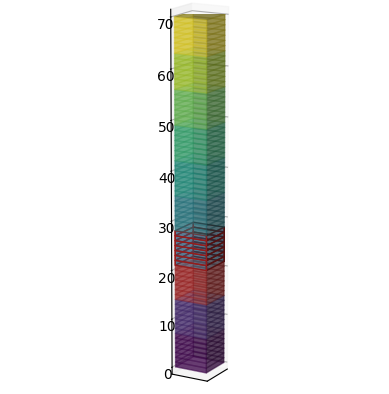

In [19]:
plotter.plot_device_schedule_trace(manager.get_data(), spacing=1, 
                                   windows=sliding_manager.all_windows, 
                                   window_schedule_times=range(len(sliding_manager.all_windows)),
                                   window_buffers_to_highlight=[2])

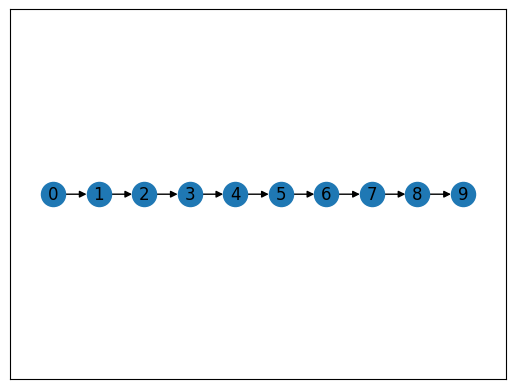

In [20]:
draw_dag(sliding_manager.window_dag)

## Regular T Schedule

In [21]:
d=7
memory_schedule = RegularTSchedule(10, 2)
manager = DeviceManager(d, memory_schedule.schedule)
sliding_manager = SlidingWindowManager(WindowBuilder(d, enforce_alignment=False))
decoder_manager = DecoderManager(lambda _: decoding_time, speculation_time)
instruction_idx_range = set(range(len(memory_schedule.schedule.all_instructions)))

while not manager.is_done():
    new_round = manager.get_next_round(instruction_idx_range - decoder_manager.decoded_instruction_idx())
    sliding_manager.process_round(new_round)
    decoder_manager.update_decoding(sliding_manager.all_windows, sliding_manager.window_dag)

# Rounds: 1231


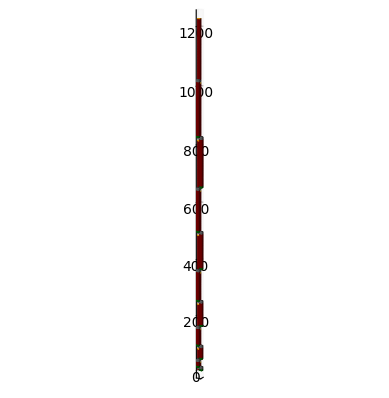

In [22]:
plotter.plot_device_schedule_trace(manager.get_data(), spacing=1)
print(f"# Rounds: {len(decoder_manager.get_data().max_parallel_processes_by_round)}")

<Axes3D: >

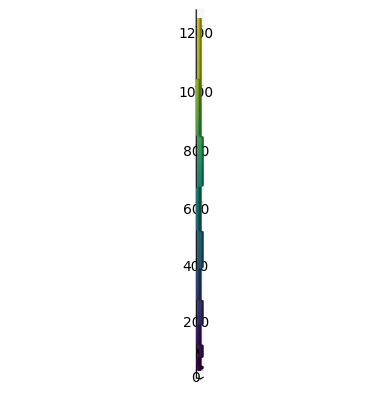

In [23]:
plotter.plot_device_schedule_trace(manager.get_data(), spacing=1,
                                   windows=sliding_manager.all_windows, 
                                   window_schedule_times=range(len(sliding_manager.all_windows)),
                                   window_buffers_to_highlight=[16],
                                   selected_window_colors=['k'])

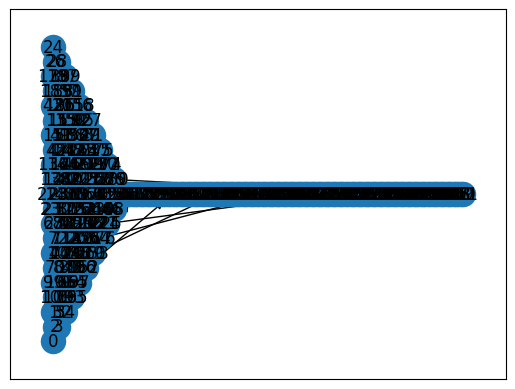

In [24]:
draw_dag(sliding_manager.window_dag)

## 15 - 1 Factory

<font color=red>VERIFY CORRECTNESS</font>

In [29]:
d=7
msd_schedule = MSD15To1Schedule()
manager = DeviceManager(d, msd_schedule.schedule)
sliding_manager = SlidingWindowManager(WindowBuilder(d, enforce_alignment=False))
decoder_manager = DecoderManager(lambda _: decoding_time, speculation_time)
instruction_idx_range = set(range(len(msd_schedule.schedule.all_instructions)))
while not manager.is_done():
    new_round = manager.get_next_round(instruction_idx_range - decoder_manager.decoded_instruction_idx())
    sliding_manager.process_round(new_round)
    decoder_manager.update_decoding(sliding_manager.all_windows, sliding_manager.window_dag)

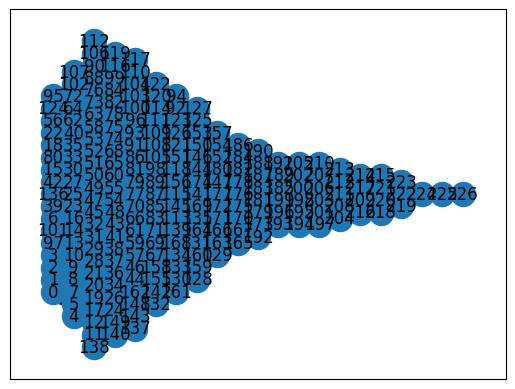

In [30]:
draw_dag(sliding_manager.window_dag)

<Axes3D: >

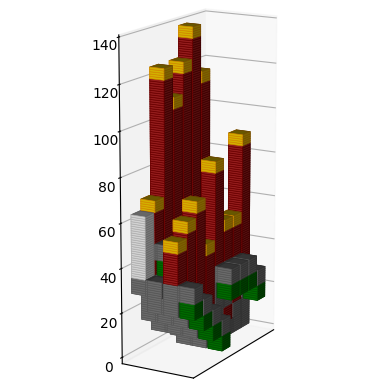

In [31]:
plotter.plot_device_schedule_trace(manager.get_data(), spacing=1)

<Axes3D: >

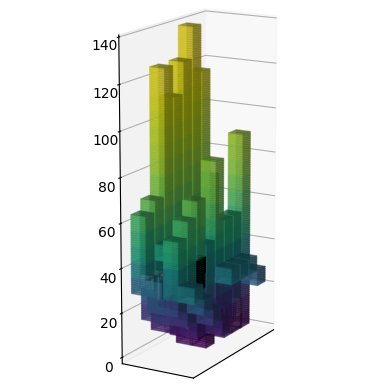

In [32]:
plotter.plot_device_schedule_trace(manager.get_data(), spacing=1,
                                   windows=sliding_manager.all_windows, 
                                   window_schedule_times=range(len(sliding_manager.all_windows)),
                                   window_buffers_to_highlight=[104],
                                   selected_window_colors=['k'])